In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

 

df = pd.read_csv(r'C:\Users\USER\Documents\Dsi team project\Pharma.csv')


# Multiple Linear Regression

 For this part chose to regress TOTAL_SPEND on variables USD_CAP, PC_HEALTHXP, and PC_GDP , to explore how these factors influence total spending. To understand the relationship between total spending and these independent variables, which we hypothesize might have an impact on the total amount spent by each country.
 
 However, it's important we are using a timeseries data set and Linear Regression is not the best model for a timeseries analysis. This model is likely to suffer from autocorrelation, stationarity, and overfitting. Models such as ARMA or ARIMA would have been better suited, but we did not cover those in the course. If we had more time we could have explored other models. 




Sort top 10 by USD_CAP (to use later)

In [ ]:
# Drop rows where 'USD_CAP' has missing values for specified countries
countries_to_drop = ['RUS', 'ISR', 'TUR', 'NZL', 'GBR']
df_cleaned = df[~df['LOCATION'].isin(countries_to_drop)]

# Now calculate the mean of 'USD_CAP' for each country (after dropping the specified countries)
mean_usd_cap = df_cleaned.groupby('LOCATION')['USD_CAP'].mean()

# Sort the countries by the mean of 'USD_CAP' in descending order
mean_usd_cap_sorted = mean_usd_cap.sort_values(ascending=False)

# Get top 10 countries based on the mean of 'USD_CAP'
top_10_countries = mean_usd_cap_sorted.head(10)

# Get bottom 10 countries based on the mean of 'USD_CAP'
bottom_10_countries = mean_usd_cap_sorted.tail(10)

# Display the results
print("Top 10 countries by mean Pharmaceutical Spending per Capita (USD_CAP):")
print(top_10_countries)

#print("\nBottom 10 countries by mean Pharmaceutical Spending per Capita (USD_CAP):")
#print(bottom_10_countries)


Top 10 countries by mean Pharmaceutical Spending per Capita (USD_CAP):
LOCATION
USA    859.267875
LUX    478.168190
ITA    446.421276
SVN    446.030071
CHE    439.933710
FRA    425.926367
SVK    419.662529
JPN    395.892562
AUT    386.203692
GRC    384.818630
Name: USD_CAP, dtype: float64


# Filtering Time (2004-2015)

In [29]:
# Filter the data to only include years 2004-2015
df_filtered_years = df[(df['TIME'] >= 2004) & (df['TIME'] <= 2015)]

Remove RUS,ISR,TUR,NZL and GBR due to missing values

In [30]:
# Filter the data to only include years 2004-2015
df_filtered_years = df[(df['TIME'] >= 2004) & (df['TIME'] <= 2015)]

# List of countries to exclude
countries_to_exclude = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']

# Filter out the countries by location (remove rows with specified countries)
df_filtered_excluded = df_filtered_years[~df_filtered_years['LOCATION'].isin(countries_to_exclude)]


# Forecast 2016 using linear regression

Start with 2016 because a few of the countries have data for 2016, so we can compare our forecast with the actual values and see how they compare

Equation of the Multiple Linear Regression Model:

# TOTAL_SPEND=β0+β1×PC_HEALTHXP+β2×PC_GDP+β3×USD_CAP+ϵ

Where:

    β0​ is the intercept (the value of TOTAL_SPEND when all independent variables are zero).
    β1​, β2​, and β3​ are the coefficients for the independent variables PC_HEALTHXP, PC_GDP, and USD_CAP, respectively.
    ϵ is the error term, representing the residuals (the difference between the observed and predicted values).

In [ ]:
from statsmodels.api import add_constant, OLS
import statsmodels.api as sm

df_filtered_excluded_2004_2015 = df_filtered_excluded[(df_filtered_excluded['TIME'] >= 2004) & 
                                                       (df_filtered_excluded['TIME'] <= 2015)]

#  Exclude specific countries (RUS, TUR, GBR, NZL, ISR)
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
df_selected_countries= df_filtered_excluded_2004_2015[~df_filtered_excluded_2004_2015['LOCATION'].isin(excluded_countries)]

# Dictionary to store models and their summaries for each country
country_models = {}

# Train the regression model for each country
for country in df_selected_countries['LOCATION'].unique():
    # Filter data for each country
    country_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    
    # Features (X) include 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP'
    X = country_data[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']]  # Independent variables
    X = add_constant(X)  # Add constant term (intercept)
    y = country_data['TOTAL_SPEND']  # Dependent variable
    
    # Train the linear regression model using OLS from statsmodels
    model = OLS(y, X).fit()
    
    # Store the model and its summary for each country
    country_models[country] = model

# Print the summary for each country's model
#for country, model in country_models.items():
    #print(f"Model Summary for {country}:'KOR'")
    #print(model.summary())
    #print("\n" + "-" * 80 + "\n")


print(f"Training Evaluation Metrics:")

r2_train = model.rsquared  
print(f"R^2: {r2_train}")

Training Evaluation Metrics:
R^2: 0.999572813384146


In [16]:


# Prepare for predictions
predictions = []

# Forecast TOTAL_SPEND for 2016
for country in df_selected_countries['LOCATION'].unique():
    # Get the trained model for the country
    model = country_models[country]
    
    # Use the last available year (2015) to estimate 2016 features
    last_year_data = df_selected_countries[df_selected_countries['LOCATION'] == country].iloc[-1]
    
    # Prepare the data for 2016 (adding a constant term for the intercept)
    X_2016 = pd.DataFrame({
        'const': [1],  # Intercept term
        'PC_HEALTHXP': [last_year_data['PC_HEALTHXP']],  # Replace with 2016 estimate if available
        'PC_GDP': [last_year_data['PC_GDP']],            # Replace with 2016 estimate if available
        'USD_CAP': [last_year_data['USD_CAP']]           # Replace with 2016 estimate if available
    })
    
    # Predict TOTAL_SPEND for 2016
    prediction_2016 = model.predict(X_2016)[0]
    
    # Store the result
    predictions.append({
        'LOCATION': country,
        'TIME': 2016,
        'Predicted_TOTAL_SPEND': prediction_2016
    })

# Create a DataFrame for the predictions
forecast_df = pd.DataFrame(predictions)

# Display the forecast results
print(forecast_df)







   LOCATION  TIME  Predicted_TOTAL_SPEND
0       AUS  2016           14509.561547
1       AUT  2016            5420.208410
2       BEL  2016            7627.111963
3       CAN  2016           27740.965053
4       CHE  2016            8733.489353
5       CZE  2016            4449.697017
6       DEU  2016           61967.300413
7       DNK  2016            1933.102367
8       ESP  2016           26723.816788
9       EST  2016             451.718287
10      FIN  2016            2725.037952
11      FRA  2016           44379.738130
12      GRC  2016            6264.940771
13      HUN  2016            5497.509502
14      IRL  2016            3191.724787
15      ISL  2016             164.618480
16      ITA  2016           36027.412276
17      JPN  2016          102322.527020
18      KOR  2016           27717.390310
19      LTU  2016            1469.618253
20      LUX  2016             321.753758
21      LVA  2016             761.625550
22      MEX  2016           35488.650894
23      NLD  201

## Compare to actual 2016
Since we have the 2016 data for 4 countries, the predicted values can be compared to the actual to see the accuracy. 

In [ ]:
#  Extract the actual data for 2016 from the original dataset
df_actual_2016 = df[df['TIME'] == 2016][['LOCATION', 'TOTAL_SPEND']]

# Merge the forecasted values with the actual data for 2016
forecast_comparison_df = pd.merge(forecast_df, df_actual_2016, on='LOCATION', how='left')

# Filter the merged DataFrame to only include rows where actual data for 2016 exists
forecast_comparison_df = forecast_comparison_df.dropna(subset=['TOTAL_SPEND'])

# Calculate the difference between forecasted and actual TOTAL_SPEND
forecast_comparison_df['Difference'] = forecast_comparison_df['Predicted_TOTAL_SPEND'] - forecast_comparison_df['TOTAL_SPEND']

# Calculate the absolute error
forecast_comparison_df['Absolute_Error'] = forecast_comparison_df['Difference'].abs()

# Display the comparison for only countries that have actual data for 2016
print(forecast_comparison_df[['LOCATION', 'Predicted_TOTAL_SPEND', 'TOTAL_SPEND', 'Difference', 'Absolute_Error']])


   LOCATION  Predicted_TOTAL_SPEND  TOTAL_SPEND   Difference  Absolute_Error
16      ITA           36000.472727     36643.66  -643.187273      643.187273
18      KOR           30777.929394     28296.65  2481.279394     2481.279394
23      NLD            7292.208182      7354.27   -62.061818       62.061818
24      NOR            2470.046061      2622.48  -152.433939      152.433939


The errors seem low enough so we will proceed to forecast 2016,2017 and 2018 

# 2016-2018 

Forecast Equation:

# TOTAL_SPEND_t^ = β0 + β1 * PC_HEALTHXP_t + β2 * PC_GDP_t + β3 * USD_CAP_t

Where:

    TOTAL_SPEND_t^ : The forecasted total spending at time t

    PC_HEALTHXP_t : Per capita health expenditure at time t

    PC_GDP_t      : Per capita GDP at time t

    USD_CAP_t     : USD per capita at time t
    
    β0, β1, β2, β3: Estimated coefficients from the regression

In [ ]:


# Filter the dataset for the years 2004-2015
df_filtered_excluded_2004_2015 = df_filtered_excluded[
    (df_filtered_excluded['TIME'] >= 2004) & (df_filtered_excluded['TIME'] <= 2015)
]

# Exclude specific countries (RUS, TUR, GBR, NZL, ISR)
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
df_filtered_excluded_2004_2015 = df_filtered_excluded_2004_2015[
    ~df_filtered_excluded_2004_2015['LOCATION'].isin(excluded_countries)
]

# Prepare the feature (X) and target (y) for the linear regression model
df_selected_countries = df_filtered_excluded_2004_2015[['LOCATION', 'TIME', 'TOTAL_SPEND', 'USD_CAP', 'PC_HEALTHXP', 'PC_GDP']]
df_selected_countries = df_selected_countries.dropna()  # Remove rows with missing data

# Initialize the model
model = LinearRegression()

# Forecast TOTAL_SPEND for 2016, 2017, and 2018 for each country
predictions = []

for country in df_selected_countries['LOCATION'].unique():
    # Filter data for each country
    country_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    
    # Features (X) are the 'USD_CAP', 'PC_HEALTHXP', 'PC_GDP', and target (y) is the 'TOTAL_SPEND'
    X = country_data[['USD_CAP', 'PC_HEALTHXP', 'PC_GDP']]  # Independent variables
    y = country_data['TOTAL_SPEND']  # Dependent variable (total spend)
    
    # Train the linear regression model
    model.fit(X, y)
    
    # Check if there is data for the year 2015 before proceeding
    if 2015 in country_data['TIME'].values:
        # Get the data for the latest year (2015) to forecast future years (2016, 2017, 2018)
        last_year_data = country_data[country_data['TIME'] == 2015].iloc[0]
        
        # Prepare input features for 2016, 2017, and 2018 (using 2015 data as proxy)
        future_years = [2016, 2017, 2018]
        
        for year in future_years:
            # Prepare the feature vector for the prediction (USD_CAP, PC_HEALTHXP, PC_GDP from 2015)
            X_future = np.array([[last_year_data['USD_CAP'], last_year_data['PC_HEALTHXP'], last_year_data['PC_GDP']]])
            
            # Predict for the future year
            predicted_spend = model.predict(X_future)[0]
            
            # Store the prediction
            predictions.append({'LOCATION': country, 'TIME': year, 'Predicted_TOTAL_SPEND': predicted_spend})
    else:
        print(f"")

# Create a DataFrame to store the results
forecast_df = pd.DataFrame(predictions)

# Display the forecast results
print(forecast_df)





   LOCATION  TIME  Predicted_TOTAL_SPEND
0       AUT  2016            5420.208410
1       AUT  2017            5420.208410
2       AUT  2018            5420.208410
3       BEL  2016            7627.111963
4       BEL  2017            7627.111963
..      ...   ...                    ...
79      SWE  2017            5014.117941
80      SWE  2018            5014.117941
81      USA  2016          372138.756399
82      USA  2017          372138.756399
83      USA  2018          372138.756399

[84 rows x 3 columns]


In [28]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL_SPEND   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6240.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           8.19e-14
Time:                        15:08:52   Log-Likelihood:                -97.632
No. Observations:                  12   AIC:                             203.3
Df Residuals:                       8   BIC:                             205.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.932e+04   1.19e+04      1.626      

 The R-square being 1 suggests overfitting. The Durbin-Watson statistic also suggests autocorrelation. We predicted both of these problems would happen earlier due to using Linear Regression.However,  the p-value of the F-statistic is really small which means the model is still significant. 
 The coefficients for PC_HEALTHXP and USD_CAP are also significant, which means these have a strong relatoinship with our target variable. 

# Plotting only top 10 for simplicity

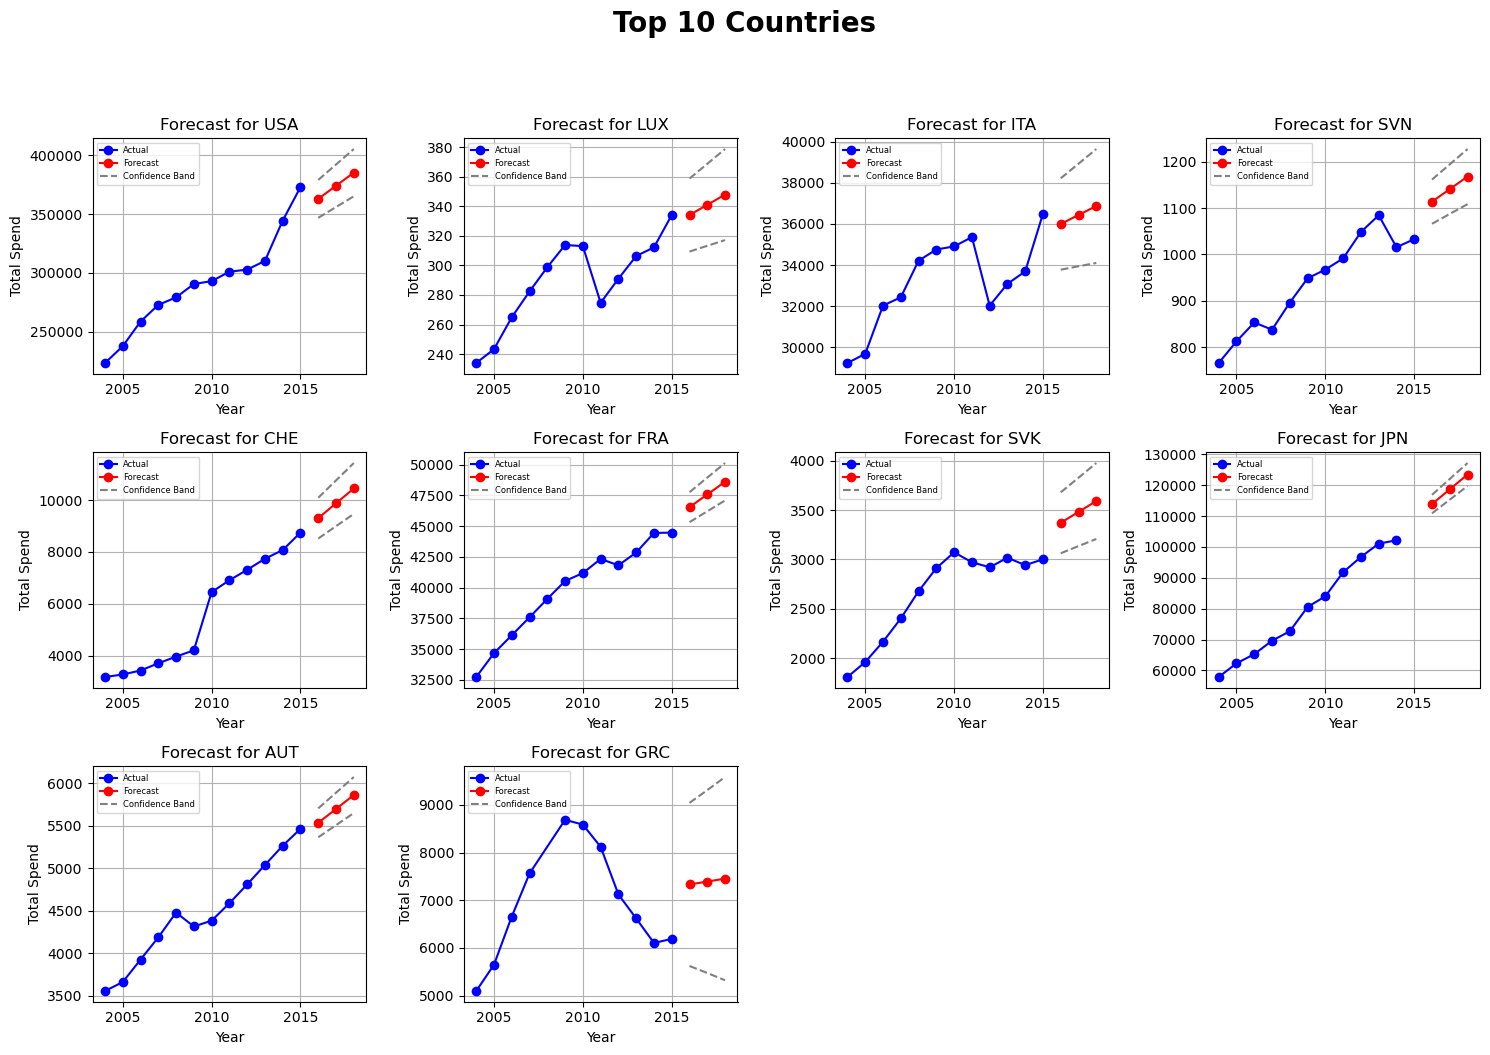

In [ ]:


# List of countries to plot
selected_countries = ['USA', 'LUX', 'ITA', 'SVN', 'CHE', 'FRA', 'SVK', 'JPN', 'AUT', 'GRC']

# Filter the dataset for the years 2004-2015
df_filtered_excluded_2004_2015 = df_filtered_excluded[
    (df_filtered_excluded['TIME'] >= 2004) & (df_filtered_excluded['TIME'] <= 2015)
]

# Exclude specific countries (RUS, TUR, GBR, NZL, ISR)
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
df_filtered_excluded_2004_2015 = df_filtered_excluded_2004_2015[
    ~df_filtered_excluded_2004_2015['LOCATION'].isin(excluded_countries)
]

# Filter for the selected countries
df_selected_countries = df_filtered_excluded_2004_2015[
    df_filtered_excluded_2004_2015['LOCATION'].isin(selected_countries)
]

# Prepare the feature (X) and target (y) for the linear regression model
df_selected_countries = df_selected_countries[['LOCATION', 'TIME', 'TOTAL_SPEND']]
df_selected_countries = df_selected_countries.dropna()  # Remove rows with missing data

# Forecast TOTAL_SPEND for 2016, 2017, and 2018 for each country
predictions = []

# Iterate through the selected countries
for country in selected_countries:
    # Filter data for each country
    country_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    
    # Features (X) are the years (TIME), target (y) is the TOTAL_SPEND
    X = country_data[['TIME']]  # Independent variable (time)
    y = country_data['TOTAL_SPEND']  # Dependent variable (total spend)
    
    # Add constant for intercept term (for statsmodels)
    X = sm.add_constant(X)
    
    # Fit the model using statsmodels
    model = sm.OLS(y, X).fit()
    
    # Prepare data for predictions
    X_pred = pd.DataFrame({'TIME': [2016, 2017, 2018]})
    X_pred = sm.add_constant(X_pred)  # Add constant to prediction data
    
    # Get predictions for 2016, 2017, and 2018
    prediction = model.get_prediction(X_pred)
    
    # Get confidence intervals (95% confidence level)
    ci = prediction.conf_int()
    
    # Store the results along with confidence intervals
    for i, year in enumerate([2016, 2017, 2018]):
        predictions.append({
            'LOCATION': country, 
            'TIME': year, 
            'Predicted_TOTAL_SPEND': prediction.predicted_mean[i], 
            'CI_Lower': ci[i, 0], 
            'CI_Upper': ci[i, 1]
        })

# Create a DataFrame to store the results
forecast_df = pd.DataFrame(predictions)

# Display the forecast results
#
# print(forecast_df)

# Visualization: Forecast vs. Actual Data with Confidence Bands as Dashed Lines
plt.figure(figsize=(15, 10))


# Add a larger title above all subplots
plt.suptitle('Top 10 Countries', fontsize=20, fontweight='bold', y=1.05)  # y=1.05 places the title a bit higher


# Iterate through each country and plot
for i, country in enumerate(selected_countries):
    # Filter actual and forecasted data for the country
    actual_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    forecast_data = forecast_df[forecast_df['LOCATION'] == country]
    
    # Create a subplot for each country
    plt.subplot(3, 4, i + 1)  # Adjust grid size based on number of countries
    
    # Plot actual data
    plt.plot(actual_data['TIME'], actual_data['TOTAL_SPEND'], label="Actual", marker='o', color='blue')
    
    # Plot forecasted data (solid line)
    plt.plot(forecast_data['TIME'], forecast_data['Predicted_TOTAL_SPEND'], label="Forecast", marker='o', color='red', linestyle='-')
    
    # Plot confidence intervals as dashed lines
    plt.plot(forecast_data['TIME'], forecast_data['CI_Lower'], label="95% CI Lower", color='gray', linestyle='--')
    plt.plot(forecast_data['TIME'], forecast_data['CI_Upper'], label="95% CI Upper", color='gray', linestyle='--')
    
    # Customize the plot
    plt.title(f"Forecast for {country}")
    plt.xlabel("Year")
    plt.ylabel("Total Spend")
    plt.grid(True)
    plt.legend(loc='upper left', labels=["Actual", "Forecast" , "Confidence Band"], fontsize=6)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


All of the forecasted points fall within the 95% confidence interval, indicating that they are statistically significant at the 95% confidence level.
Although our model suffers from some limitations, the outcome is still significant. 